# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import seaborn as sns
import glob
import math

# Reading dataset

In [2]:
# Read CSV file
df = pd.read_csv("California_Houses.csv")

# Display info
print(df.shape)   # Shows total rows & columns
print(df.head())  # Shows first 5 rows
print(df.isnull().sum())

(20640, 14)
   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984       

# Correlation Matrix

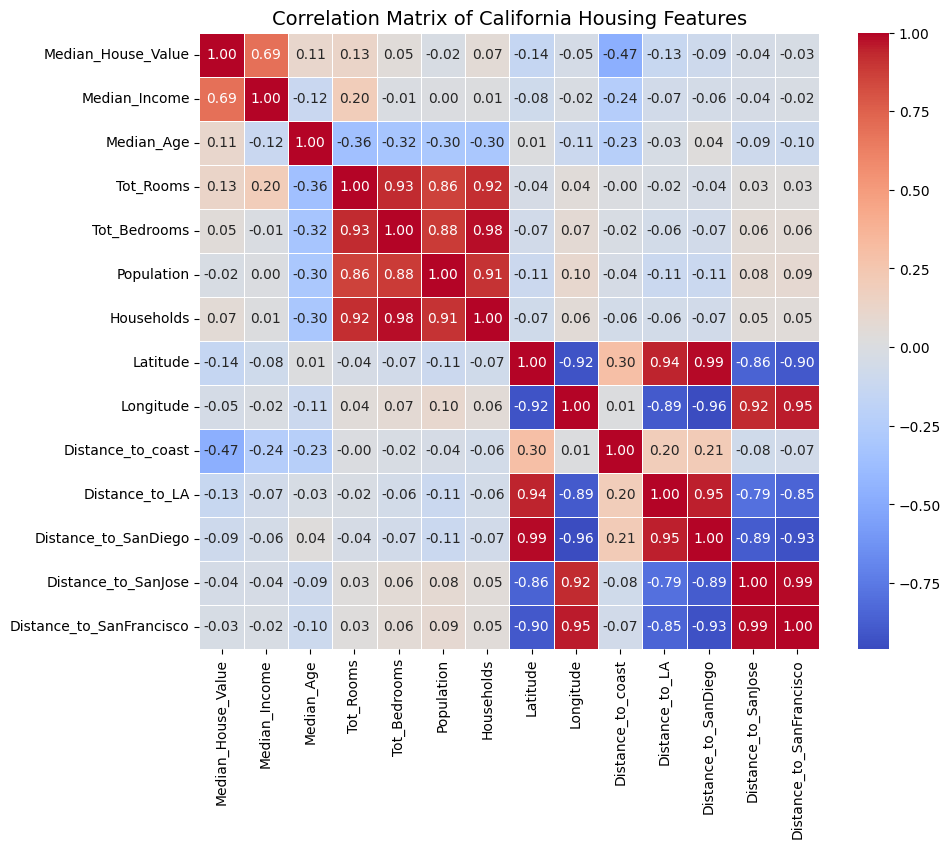

In [3]:
corr = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix of California Housing Features", fontsize=14)
plt.show()

# Feature Engineering

In [4]:
df["person_per_room"] = df["Population"] / df["Tot_Rooms"]
df["bedrooms_ratio"] = df["Tot_Bedrooms"] / df["Tot_Rooms"]
df["population_per_household"] = df["Population"] / df["Households"]
df = df.drop("Distance_to_SanJose", axis=1)

# Display info
print(df.shape)   # Shows total rows & columns
print(df.head())  # Shows first 5 rows
print(df.isnull().sum())

(20640, 16)
   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanFrancisco  \
0   556529.158342         735501.806984  

# Separate features (x) and target (y)

Mean price: 206855.81690891474


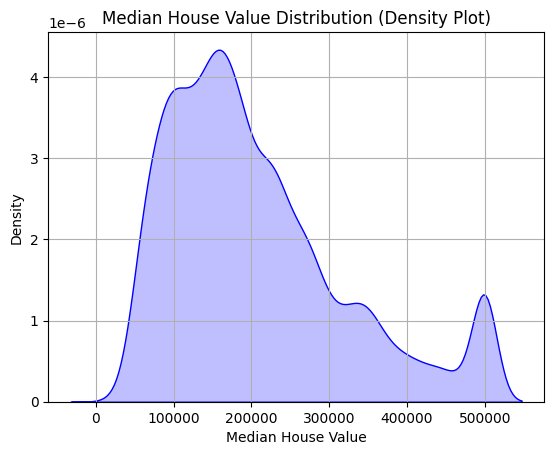

   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanFrancisco  \
0   556529.158342         735501.806984              

In [6]:
x = df.drop("Median_House_Value", axis=1)  # Features
y = df["Median_House_Value"]  # Target
print("Mean price:", y.mean())
y.median()


# Example data (replace with actual prices)
sns.kdeplot(df["Median_House_Value"], fill=True, color='blue')

plt.xlabel("Median House Value")
plt.ylabel("Density")
plt.title("Median House Value Distribution (Density Plot)")
plt.grid(True)
plt.show()


print(df.head())

# Split data: 70% train, 15% validation, 15% test

In [7]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Scaling the data (zero mean, unit variance)

In [8]:
scaler = StandardScaler()

# Fit on training data, transform all sets
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Linear Regression Model

In [9]:
# Train model
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = lr_model.predict(x_train_scaled)
y_val_pred = lr_model.predict(x_val_scaled)
y_test_pred = lr_model.predict(x_test_scaled)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Relative RMSE / Median(y)
train_relative_error = math.sqrt(train_mse) / y.median()
val_relative_error = math.sqrt(val_mse) / y.median()
test_relative_error = math.sqrt(test_mse) / y.median()

# Results
print("Linear Regression Performance")
print("-" * 50)
print(f"Train MSE: {train_mse:.2f} | MAE: {train_mae:.2f} | RMSE/Median(y): {train_relative_error:.3f}")
print(f"Val   MSE: {val_mse:.2f} | MAE: {val_mae:.2f} | RMSE/Median(y): {val_relative_error:.3f}")
print(f"Test  MSE: {test_mse:.2f} | MAE: {test_mae:.2f} | RMSE/Median(y): {test_relative_error:.3f}")

Linear Regression Performance
--------------------------------------------------
Train MSE: 4651231009.02 | MAE: 49242.72 | RMSE/Median(y): 0.380
Val   MSE: 4860419787.58 | MAE: 50334.15 | RMSE/Median(y): 0.388
Test  MSE: 4358040330.50 | MAE: 48418.86 | RMSE/Median(y): 0.367


# L1 Regularization

In [10]:
# Train model
lasso_model = Lasso(alpha=1, max_iter=10000)
lasso_model.fit(x_train_scaled, y_train)

# Predictions
y_train_lasso = lasso_model.predict(x_train_scaled)
y_val_lasso = lasso_model.predict(x_val_scaled)
y_test_lasso = lasso_model.predict(x_test_scaled)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_lasso)
val_mse = mean_squared_error(y_val, y_val_lasso)
test_mse = mean_squared_error(y_test, y_test_lasso)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_lasso)
val_mae = mean_absolute_error(y_val, y_val_lasso)
test_mae = mean_absolute_error(y_test, y_test_lasso)

# Relative RMSE / Median(y)
train_relative_error = math.sqrt(train_mse) / y.median()
val_relative_error = math.sqrt(val_mse) / y.median()
test_relative_error = math.sqrt(test_mse) / y.median()

# Results
print("Lasso Regression Performance")
print("-" * 50)
print(f"Train MSE: {train_mse:.2f} | MAE: {train_mae:.2f} | RMSE/Median(y): {train_relative_error:.3f}")
print(f"Val   MSE: {val_mse:.2f} | MAE: {val_mae:.2f} | RMSE/Median(y): {val_relative_error:.3f}")
print(f"Test  MSE: {test_mse:.2f} | MAE: {test_mae:.2f} | RMSE/Median(y): {test_relative_error:.3f}")


Lasso Regression Performance
--------------------------------------------------
Train MSE: 4651231940.31 | MAE: 49243.88 | RMSE/Median(y): 0.380
Val   MSE: 4860443294.02 | MAE: 50335.15 | RMSE/Median(y): 0.388
Test  MSE: 4358057167.97 | MAE: 48419.50 | RMSE/Median(y): 0.367


# L2 Regularization

In [11]:
# Train model
ridge_model = Ridge(alpha=1, max_iter=10000)
ridge_model.fit(x_train_scaled, y_train)

# Predictions
y_train_ridge = ridge_model.predict(x_train_scaled)
y_val_ridge = ridge_model.predict(x_val_scaled)
y_test_ridge = ridge_model.predict(x_test_scaled)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_ridge)
val_mse = mean_squared_error(y_val, y_val_ridge)
test_mse = mean_squared_error(y_test, y_test_ridge)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_ridge)
val_mae = mean_absolute_error(y_val, y_val_ridge)
test_mae = mean_absolute_error(y_test, y_test_ridge)

# Relative RMSE / Median(y)
train_relative_error = math.sqrt(train_mse) / y.median()
val_relative_error = math.sqrt(val_mse) / y.median()
test_relative_error = math.sqrt(test_mse) / y.median()

# Results
print("Ridge Regression Performance")
print("-" * 50)
print(f"Train MSE: {train_mse:.2f} | MAE: {train_mae:.2f} | RMSE/Median(y): {train_relative_error:.3f}")
print(f"Val   MSE: {val_mse:.2f} | MAE: {val_mae:.2f} | RMSE/Median(y): {val_relative_error:.3f}")
print(f"Test  MSE: {test_mse:.2f} | MAE: {test_mae:.2f} | RMSE/Median(y): {test_relative_error:.3f}")


Ridge Regression Performance
--------------------------------------------------
Train MSE: 4651247984.27 | MAE: 49247.49 | RMSE/Median(y): 0.380
Val   MSE: 4860571186.63 | MAE: 50338.69 | RMSE/Median(y): 0.388
Test  MSE: 4358099227.84 | MAE: 48422.13 | RMSE/Median(y): 0.367


# Gradient Descent

In [12]:
# Grid Search for best parameters 

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'eta0': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

grid = GridSearchCV(
    SGDRegressor(
        penalty='l2', 
        max_iter=1000, 
        random_state=42
    ),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)

grid.fit(x_train_scaled, y_train)
print("Best parameters:", grid.best_params_)
print("Best validation MSE:", -grid.best_score_)

E:\APPS\python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
E:\APPS\python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
E:\APPS\python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
E:\APPS\python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
E:\APPS\python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceW

Best parameters: {'alpha': 0.1, 'eta0': 0.01, 'learning_rate': 'constant'}
Best validation MSE: 110581070352.41702


In [13]:
# Train model
model = SGDRegressor(
    alpha=0.0001,
    max_iter=1000,
    eta0=0.0001,
    learning_rate='adaptive',
    penalty=None,
    random_state=42,
    warm_start=True
)
model.fit(x_train_scaled, y_train)

# Predictions
y_train_pred = model.predict(x_train_scaled)
y_val_pred = model.predict(x_val_scaled)
y_test_pred = model.predict(x_test_scaled)

# Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Mean Absolute Error (MAE)
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Relative RMSE / Median(y)
train_relative_error = math.sqrt(train_mse) / y.median()
val_relative_error = math.sqrt(val_mse) / y.median()
test_relative_error = math.sqrt(test_mse) / y.median()

# Results
print("SGD Regressor Performance (Manual Gradient Descent)")
print("-" * 50)
print(f"Train MSE: {train_mse:.2f} | MAE: {train_mae:.2f} | RMSE/Median(y): {train_relative_error:.3f}")
print(f"Val   MSE: {val_mse:.2f} | MAE: {val_mae:.2f} | RMSE/Median(y): {val_relative_error:.3f}")
print(f"Test  MSE: {test_mse:.2f} | MAE: {test_mae:.2f} | RMSE/Median(y): {test_relative_error:.3f}")


SGD Regressor Performance (Manual Gradient Descent)
--------------------------------------------------
Train MSE: 4664214407.22 | MAE: 49448.79 | RMSE/Median(y): 0.380
Val   MSE: 4879344896.93 | MAE: 50556.88 | RMSE/Median(y): 0.389
Test  MSE: 4370301949.09 | MAE: 48554.92 | RMSE/Median(y): 0.368


E:\APPS\python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
